In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#### Prepare for Dataset

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


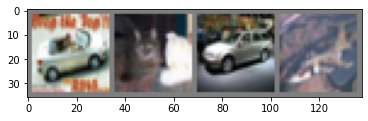

  car   cat   car plane


In [3]:
# The function to show an image.
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images.
dataiter = iter(trainloader)
images, labels = next(dataiter)
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### Choose a Device

In [4]:
# If there are GPUs, choose the first one for computing. Otherwise use CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
# If 'cuda:0' is printed, it means GPU is available.

cuda:0


#### Network Definition

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ###### Fill the blank here ######
        
        self.convo1 = nn.Conv2d(3,32,3,1,1)
        self.activation1 = nn.ReLU()
        self.apool1 = nn.AvgPool2d(kernel_size = (2,2))
        
        self.convo2 = nn.Conv2d(32,16,3,1,1)
        self.activation2 = nn.ReLU()
        self.apool2 = nn.AvgPool2d(kernel_size = (2,2))
        
        self.flat = nn.Flatten()
        
        self.fc1 = nn.Linear(1024,100)
        self.activation3 = nn.ReLU()
        self.fc2 = nn.Linear(100,10)
        
        
    def forward(self, x):
        ###### Fill the blank here ######
        
        x = self.activation1(self.convo1(x))
        x = self.apool1(x)
        x = self.activation2(self.convo2(x))
        x = self.apool2(x)
        x = self.flat(x)
        x = self.fc1(self.activation3(x))
        x = self.fc2(x)
        
        
        return x 

net = Net()     # Create the network instance.
net.to(device)  # Move the network parameters to the specified device.

Net(
  (convo1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (activation1): ReLU()
  (apool1): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (convo2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (activation2): ReLU()
  (apool2): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1024, out_features=100, bias=True)
  (activation3): ReLU()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

#### Optimizer and Loss Function

In [6]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 

#### Training Procedure

In [7]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.299
[epoch: 0, i:   199] avg mini-batch loss: 2.280
[epoch: 0, i:   299] avg mini-batch loss: 2.255
[epoch: 0, i:   399] avg mini-batch loss: 2.192
[epoch: 0, i:   499] avg mini-batch loss: 2.160
[epoch: 0, i:   599] avg mini-batch loss: 2.126
[epoch: 0, i:   699] avg mini-batch loss: 2.052
[epoch: 0, i:   799] avg mini-batch loss: 1.984
[epoch: 0, i:   899] avg mini-batch loss: 2.013
[epoch: 0, i:   999] avg mini-batch loss: 1.951
[epoch: 0, i:  1099] avg mini-batch loss: 1.911
[epoch: 0, i:  1199] avg mini-batch loss: 1.966
[epoch: 0, i:  1299] avg mini-batch loss: 1.909
[epoch: 0, i:  1399] avg mini-batch loss: 1.790
[epoch: 0, i:  1499] avg mini-batch loss: 1.918
[epoch: 0, i:  1599] avg mini-batch loss: 1.914
[epoch: 0, i:  1699] avg mini-batch loss: 1.821
[epoch: 0, i:  1799] avg mini-batch loss: 1.840
[epoch: 0, i:  1899] avg mini-batch loss: 1.825
[epoch: 0, i:  1999] avg mini-batch loss: 1.803
[epoch: 0, i:  2099] avg mini-batch loss

[epoch: 1, i:  4699] avg mini-batch loss: 1.216
[epoch: 1, i:  4799] avg mini-batch loss: 1.192
[epoch: 1, i:  4899] avg mini-batch loss: 1.309
[epoch: 1, i:  4999] avg mini-batch loss: 1.210
[epoch: 1, i:  5099] avg mini-batch loss: 1.302
[epoch: 1, i:  5199] avg mini-batch loss: 1.272
[epoch: 1, i:  5299] avg mini-batch loss: 1.299
[epoch: 1, i:  5399] avg mini-batch loss: 1.326
[epoch: 1, i:  5499] avg mini-batch loss: 1.232
[epoch: 1, i:  5599] avg mini-batch loss: 1.289
[epoch: 1, i:  5699] avg mini-batch loss: 1.304
[epoch: 1, i:  5799] avg mini-batch loss: 1.149
[epoch: 1, i:  5899] avg mini-batch loss: 1.200
[epoch: 1, i:  5999] avg mini-batch loss: 1.271
[epoch: 1, i:  6099] avg mini-batch loss: 1.223
[epoch: 1, i:  6199] avg mini-batch loss: 1.186
[epoch: 1, i:  6299] avg mini-batch loss: 1.234
[epoch: 1, i:  6399] avg mini-batch loss: 1.387
[epoch: 1, i:  6499] avg mini-batch loss: 1.280
[epoch: 1, i:  6599] avg mini-batch loss: 1.231
[epoch: 1, i:  6699] avg mini-batch loss

[epoch: 2, i:  9299] avg mini-batch loss: 1.167
[epoch: 2, i:  9399] avg mini-batch loss: 1.058
[epoch: 2, i:  9499] avg mini-batch loss: 1.129
[epoch: 2, i:  9599] avg mini-batch loss: 1.065
[epoch: 2, i:  9699] avg mini-batch loss: 1.112
[epoch: 2, i:  9799] avg mini-batch loss: 1.063
[epoch: 2, i:  9899] avg mini-batch loss: 1.185
[epoch: 2, i:  9999] avg mini-batch loss: 0.979
[epoch: 2, i: 10099] avg mini-batch loss: 1.150
[epoch: 2, i: 10199] avg mini-batch loss: 1.186
[epoch: 2, i: 10299] avg mini-batch loss: 1.133
[epoch: 2, i: 10399] avg mini-batch loss: 1.110
[epoch: 2, i: 10499] avg mini-batch loss: 1.042
[epoch: 2, i: 10599] avg mini-batch loss: 1.092
[epoch: 2, i: 10699] avg mini-batch loss: 1.139
[epoch: 2, i: 10799] avg mini-batch loss: 1.170
[epoch: 2, i: 10899] avg mini-batch loss: 1.019
[epoch: 2, i: 10999] avg mini-batch loss: 1.174
[epoch: 2, i: 11099] avg mini-batch loss: 1.140
[epoch: 2, i: 11199] avg mini-batch loss: 1.166
[epoch: 2, i: 11299] avg mini-batch loss

[epoch: 4, i:  1399] avg mini-batch loss: 0.885
[epoch: 4, i:  1499] avg mini-batch loss: 0.996
[epoch: 4, i:  1599] avg mini-batch loss: 0.952
[epoch: 4, i:  1699] avg mini-batch loss: 1.115
[epoch: 4, i:  1799] avg mini-batch loss: 1.053
[epoch: 4, i:  1899] avg mini-batch loss: 0.994
[epoch: 4, i:  1999] avg mini-batch loss: 0.974
[epoch: 4, i:  2099] avg mini-batch loss: 0.973
[epoch: 4, i:  2199] avg mini-batch loss: 0.974
[epoch: 4, i:  2299] avg mini-batch loss: 1.026
[epoch: 4, i:  2399] avg mini-batch loss: 0.999
[epoch: 4, i:  2499] avg mini-batch loss: 1.006
[epoch: 4, i:  2599] avg mini-batch loss: 0.969
[epoch: 4, i:  2699] avg mini-batch loss: 0.962
[epoch: 4, i:  2799] avg mini-batch loss: 0.978
[epoch: 4, i:  2899] avg mini-batch loss: 1.121
[epoch: 4, i:  2999] avg mini-batch loss: 0.995
[epoch: 4, i:  3099] avg mini-batch loss: 0.991
[epoch: 4, i:  3199] avg mini-batch loss: 1.031
[epoch: 4, i:  3299] avg mini-batch loss: 0.946
[epoch: 4, i:  3399] avg mini-batch loss

[epoch: 5, i:  5999] avg mini-batch loss: 1.002
[epoch: 5, i:  6099] avg mini-batch loss: 0.967
[epoch: 5, i:  6199] avg mini-batch loss: 0.998
[epoch: 5, i:  6299] avg mini-batch loss: 0.970
[epoch: 5, i:  6399] avg mini-batch loss: 0.969
[epoch: 5, i:  6499] avg mini-batch loss: 0.965
[epoch: 5, i:  6599] avg mini-batch loss: 0.866
[epoch: 5, i:  6699] avg mini-batch loss: 0.980
[epoch: 5, i:  6799] avg mini-batch loss: 0.936
[epoch: 5, i:  6899] avg mini-batch loss: 0.991
[epoch: 5, i:  6999] avg mini-batch loss: 0.971
[epoch: 5, i:  7099] avg mini-batch loss: 0.942
[epoch: 5, i:  7199] avg mini-batch loss: 0.887
[epoch: 5, i:  7299] avg mini-batch loss: 0.947
[epoch: 5, i:  7399] avg mini-batch loss: 1.030
[epoch: 5, i:  7499] avg mini-batch loss: 0.919
[epoch: 5, i:  7599] avg mini-batch loss: 0.999
[epoch: 5, i:  7699] avg mini-batch loss: 0.939
[epoch: 5, i:  7799] avg mini-batch loss: 0.951
[epoch: 5, i:  7899] avg mini-batch loss: 0.883
[epoch: 5, i:  7999] avg mini-batch loss

[epoch: 6, i: 10599] avg mini-batch loss: 0.888
[epoch: 6, i: 10699] avg mini-batch loss: 0.915
[epoch: 6, i: 10799] avg mini-batch loss: 0.887
[epoch: 6, i: 10899] avg mini-batch loss: 0.753
[epoch: 6, i: 10999] avg mini-batch loss: 0.904
[epoch: 6, i: 11099] avg mini-batch loss: 0.905
[epoch: 6, i: 11199] avg mini-batch loss: 0.918
[epoch: 6, i: 11299] avg mini-batch loss: 0.875
[epoch: 6, i: 11399] avg mini-batch loss: 0.855
[epoch: 6, i: 11499] avg mini-batch loss: 0.943
[epoch: 6, i: 11599] avg mini-batch loss: 0.982
[epoch: 6, i: 11699] avg mini-batch loss: 1.013
[epoch: 6, i: 11799] avg mini-batch loss: 0.935
[epoch: 6, i: 11899] avg mini-batch loss: 0.857
[epoch: 6, i: 11999] avg mini-batch loss: 0.937
[epoch: 6, i: 12099] avg mini-batch loss: 0.855
[epoch: 6, i: 12199] avg mini-batch loss: 0.876
[epoch: 6, i: 12299] avg mini-batch loss: 0.872
[epoch: 6, i: 12399] avg mini-batch loss: 0.853
[epoch: 6, i: 12499] avg mini-batch loss: 0.961
[epoch: 7, i:    99] avg mini-batch loss

[epoch: 8, i:  2699] avg mini-batch loss: 0.835
[epoch: 8, i:  2799] avg mini-batch loss: 0.948
[epoch: 8, i:  2899] avg mini-batch loss: 0.888
[epoch: 8, i:  2999] avg mini-batch loss: 0.871
[epoch: 8, i:  3099] avg mini-batch loss: 0.907
[epoch: 8, i:  3199] avg mini-batch loss: 0.931
[epoch: 8, i:  3299] avg mini-batch loss: 0.903
[epoch: 8, i:  3399] avg mini-batch loss: 0.865
[epoch: 8, i:  3499] avg mini-batch loss: 0.824
[epoch: 8, i:  3599] avg mini-batch loss: 0.876
[epoch: 8, i:  3699] avg mini-batch loss: 0.907
[epoch: 8, i:  3799] avg mini-batch loss: 0.786
[epoch: 8, i:  3899] avg mini-batch loss: 0.797
[epoch: 8, i:  3999] avg mini-batch loss: 0.956
[epoch: 8, i:  4099] avg mini-batch loss: 0.839
[epoch: 8, i:  4199] avg mini-batch loss: 0.886
[epoch: 8, i:  4299] avg mini-batch loss: 0.923
[epoch: 8, i:  4399] avg mini-batch loss: 0.879
[epoch: 8, i:  4499] avg mini-batch loss: 0.791
[epoch: 8, i:  4599] avg mini-batch loss: 0.855
[epoch: 8, i:  4699] avg mini-batch loss

[epoch: 9, i:  7299] avg mini-batch loss: 0.895
[epoch: 9, i:  7399] avg mini-batch loss: 0.892
[epoch: 9, i:  7499] avg mini-batch loss: 0.828
[epoch: 9, i:  7599] avg mini-batch loss: 0.859
[epoch: 9, i:  7699] avg mini-batch loss: 0.981
[epoch: 9, i:  7799] avg mini-batch loss: 0.862
[epoch: 9, i:  7899] avg mini-batch loss: 0.855
[epoch: 9, i:  7999] avg mini-batch loss: 0.873
[epoch: 9, i:  8099] avg mini-batch loss: 0.847
[epoch: 9, i:  8199] avg mini-batch loss: 0.860
[epoch: 9, i:  8299] avg mini-batch loss: 0.779
[epoch: 9, i:  8399] avg mini-batch loss: 0.819
[epoch: 9, i:  8499] avg mini-batch loss: 0.860
[epoch: 9, i:  8599] avg mini-batch loss: 0.831
[epoch: 9, i:  8699] avg mini-batch loss: 0.895
[epoch: 9, i:  8799] avg mini-batch loss: 0.812
[epoch: 9, i:  8899] avg mini-batch loss: 0.833
[epoch: 9, i:  8999] avg mini-batch loss: 0.832
[epoch: 9, i:  9099] avg mini-batch loss: 0.820
[epoch: 9, i:  9199] avg mini-batch loss: 0.927
[epoch: 9, i:  9299] avg mini-batch loss

#### Training Loss Curve

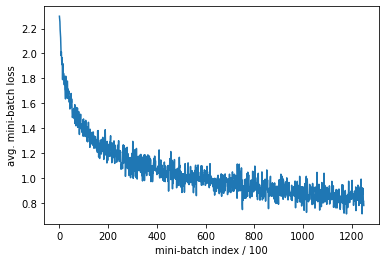

In [8]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

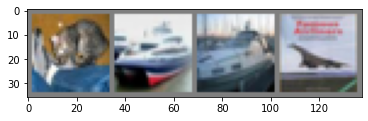

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship  ship


In [10]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [11]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 67 %


In [12]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 78 %
Accuracy of   car : 77 %
Accuracy of  bird : 57 %
Accuracy of   cat : 44 %
Accuracy of  deer : 49 %
Accuracy of   dog : 57 %
Accuracy of  frog : 85 %
Accuracy of horse : 70 %
Accuracy of  ship : 72 %
Accuracy of truck : 80 %
